In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# python3.5 environment 

In [2]:
# tensorflow 初始化环境变量
w=tf.Variable([[0.5,1.0]])
x=tf.Variable([[2.0],[3.0]])
y=tf.matmul(w,x)

init_op=tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init_op)
    print(y.eval)
print(x)
print(y)

<bound method Tensor.eval of <tf.Tensor 'MatMul:0' shape=(1, 1) dtype=float32>>
<tf.Variable 'Variable_1:0' shape=(2, 1) dtype=float32_ref>
Tensor("MatMul:0", shape=(1, 1), dtype=float32)


In [3]:
# 构建数字对象

tensor=tf.constant([1,2,3,4,5,6,7,]) # [1,2,3,4,5,6,7]
tensor=tf.constant(-1.0,shape=[2,3]) # [[-1.,-1.,-1.],[-1.,-1.,-1.]]
tf.linspace(10.0,12.0,3,name="linspace") # [ 10.0 11.0 12.0]
start=3
limit=18
delta=3
tf.range(start,limit,delta)


<tf.Tensor 'range:0' shape=(5,) dtype=int32>

In [4]:
# 随机数
nrm=tf.random_normal([2,3],mean=-1,stddev=4)

c=tf.constant([[1,2],[3,4],[5,6]])
shuff=tf.random_shuffle(c)
sess=tf.Session()
print(sess.run(nrm))
print(sess.run(shuff))


[[ 2.92884898  0.72279453 -0.84405452]
 [-3.22858214  2.7976141   2.51509047]]
[[1 2]
 [5 6]
 [3 4]]


In [5]:
arr=np.zeros((3,3))
tarr=tf.convert_to_tensor(arr)
with tf.Session() as sess:
    print(sess.run(tarr))


[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]]


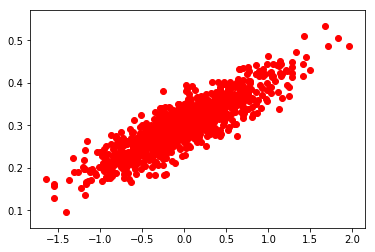

In [6]:
# 随机生成1000 个点，围绕在 y=0.1x+0.3的直线周围，生成样本数据
num_points=1000
vectors_set=[]
for i in range(num_points):
    x=np.random.normal(0.0,0.55)
    y=x*0.1+0.3+np.random.normal(0.0,0.03)
    vectors_set.append([x,y])
# 生成一些样本
x_data=[v[0] for v in vectors_set]
y_data=[v[1] for v in vectors_set]
plt.scatter(x_data,y_data,c='r')
plt.show()


In [7]:
# 通过
# 生成1维的w矩阵，取值是 [-1,1]之间的随机数
w=tf.Variable(tf.random_uniform([1],-1.0,1.0),name='W')
# 生成1维的b矩阵，初始值是0
b=tf.Variable(tf.zeros([1],name='b'))
# 经过计算得出预估值 y
y=w*x_data+b
# 以估计值 y和实际值 y_data之间的均方差作为损失
loss =tf.reduce_mean(tf.square(y-y_data),name='loss')
# 采用梯度下降法来优化参数
optimizer=tf.train.GradientDescentOptimizer(0.5)
# 训练的过程就是最小化这个误差值
train=optimizer.minimize(loss,name='train')

sess=tf.Session()
init=tf.global_variables_initializer()
sess.run(init)
print('w=',sess.run(w),'b=',sess.run(b),'loss=',sess.run(loss))
# 执行20次训练
for step in range(200):
    sess.run(train)
    # 输出训练好的 w和b
    print('w=',sess.run(w),'b=',sess.run(b),'loss=',sess.run(loss))
writer=tf.train.SummarySaverHook(sess.graph,scaffold=tf.train.Scaffold(summary_op=tf.summary.merge_all()))


w= [-0.31118155] b= [ 0.] loss= 0.132966
w= [-0.19932316] b= [ 0.2873455] loss= 0.0270585
w= [-0.11157345] b= [ 0.29086849] loss= 0.0139092
w= [-0.04972485] b= [ 0.29363221] loss= 0.00737422
w= [-0.0061233] b= [ 0.29558018] loss= 0.00412644
w= [ 0.02461459] b= [ 0.29695341] loss= 0.00251234
w= [ 0.04628393] b= [ 0.29792151] loss= 0.00171015
w= [ 0.06156022] b= [ 0.29860401] loss= 0.00131148
w= [ 0.07232958] b= [ 0.29908514] loss= 0.00111334
w= [ 0.07992168] b= [ 0.29942432] loss= 0.00101487
w= [ 0.08527389] b= [ 0.29966345] loss= 0.000965933
w= [ 0.08904706] b= [ 0.29983202] loss= 0.000941611
w= [ 0.09170704] b= [ 0.29995084] loss= 0.000929524
w= [ 0.09358224] b= [ 0.30003461] loss= 0.000923516
w= [ 0.09490421] b= [ 0.30009368] loss= 0.000920531
w= [ 0.09583616] b= [ 0.30013531] loss= 0.000919047
w= [ 0.09649316] b= [ 0.30016467] loss= 0.00091831
w= [ 0.09695633] b= [ 0.30018535] loss= 0.000917943
w= [ 0.09728285] b= [ 0.30019996] loss= 0.000917761
w= [ 0.09751303] b= [ 0.30021024] los